## <font color= red> Import Modules and Data </font>

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#data preperation
from sklearn.model_selection import train_test_split

#ML algorithms
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
url = "https://raw.githubusercontent.com/vkoul/data/main/misc/tshirt_sales.csv"
df = pd.read_csv(url)

url_II = "https://raw.githubusercontent.com/vkoul/data/main/misc/business_scenario.csv"
scenario = pd.read_csv(url_II)

In [3]:
scenario.columns

Index(['business_context', 'scenario', 'price', 'adv', 'promo'], dtype='object')

In [4]:
df.columns

Index(['Year', 'Month', 'units_sold', 'dollar_price', 'advertisment',
       'promotions'],
      dtype='object')

## <font color= red> Data Inspection </font>

In [5]:
df.head(5)

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71


In [6]:
df.shape

(24, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   Month         24 non-null     int64  
 2   units_sold    24 non-null     int64  
 3   dollar_price  24 non-null     float64
 4   advertisment  24 non-null     float64
 5   promotions    24 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.2 KB


In [8]:
df.isnull().sum()

Year            0
Month           0
units_sold      0
dollar_price    0
advertisment    0
promotions      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
key_columns = ['units_sold', 'dollar_price', 'advertisment', 'promotions']
key_columns

['units_sold', 'dollar_price', 'advertisment', 'promotions']

In [11]:
df[key_columns].describe().round(3)

,units_sold,dollar_price,advertisment,promotions
count,24.000,24.000,24.000,24.000
mean,74258.292,8.132,50.153,59.876
std,3164.395,0.507,1.279,0.682
min,69003.000,7.250,48.000,58.000
25%,71959.500,7.900,49.405,59.635
50%,74103.000,8.150,50.120,59.895
75%,76354.500,8.425,50.772,60.238
max,80364.000,8.990,54.000,61.130


## <font color= red> EDA </font>

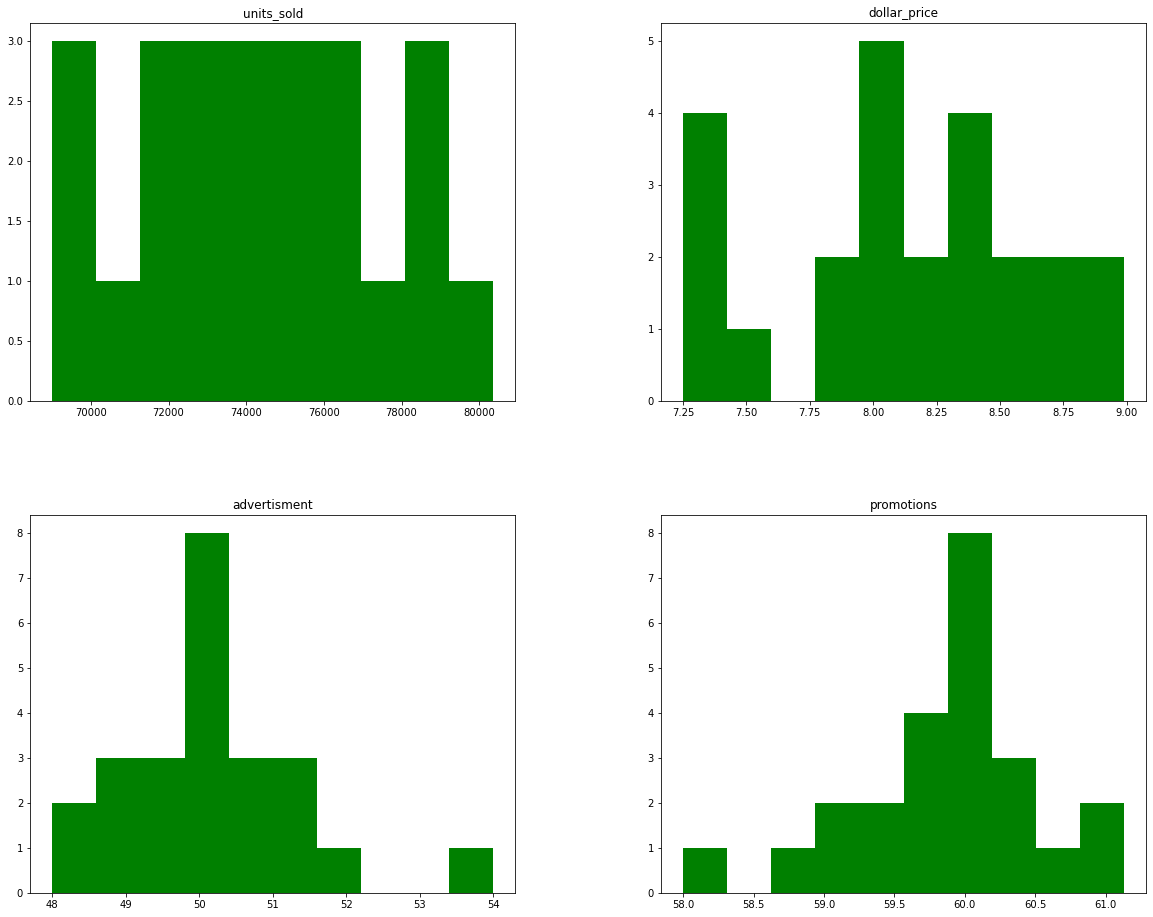

In [12]:
df[key_columns].hist(figsize=(20,16), grid = False, color = 'green');

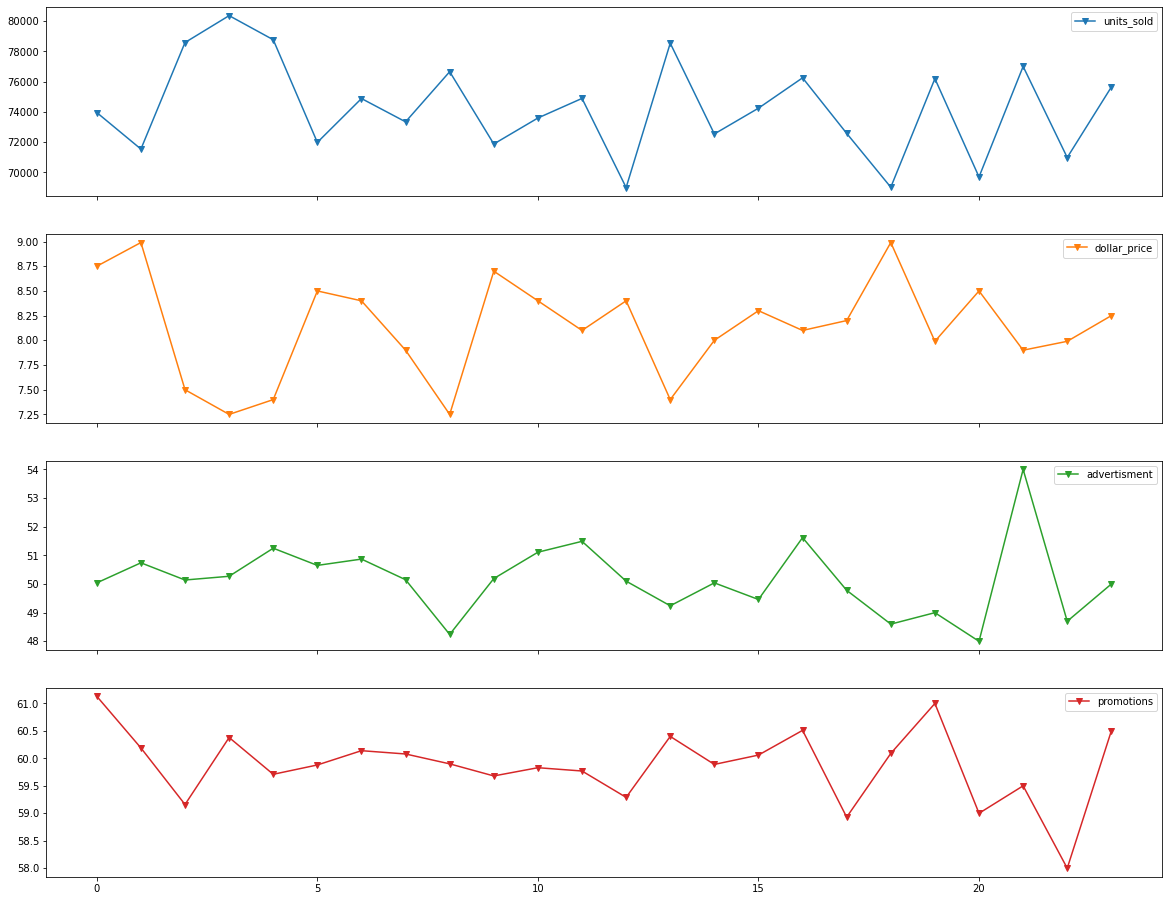

In [13]:
df[key_columns].plot.line(figsize=(20,16), subplots=True, marker = 'v');

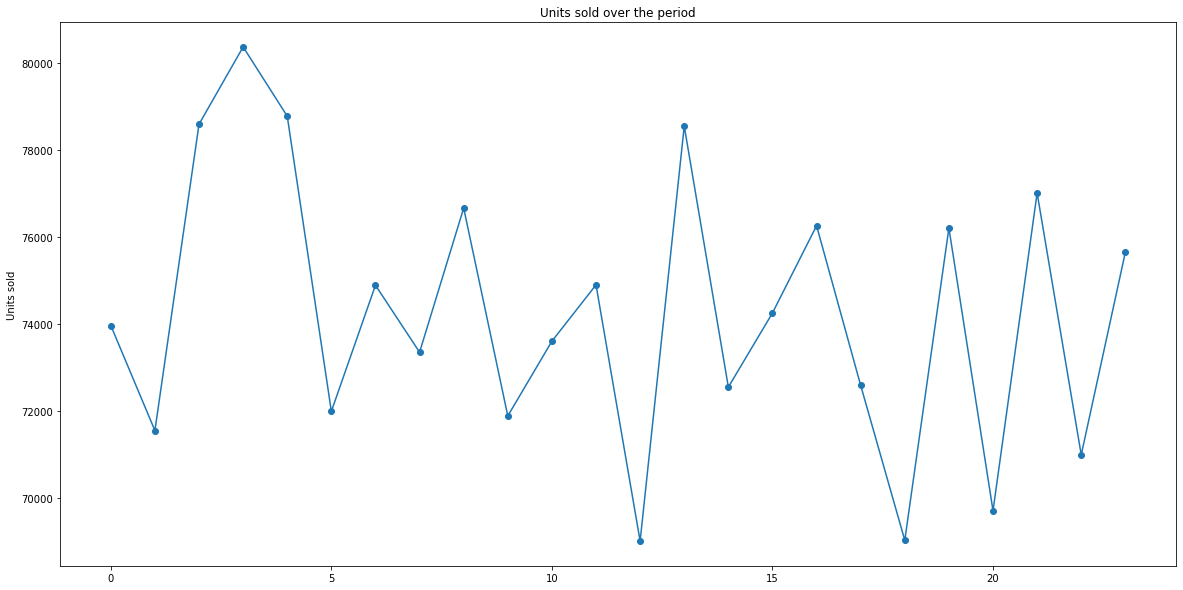

In [14]:
# # plot size
plt.figure(figsize = (20,10))

# # line chart
df["units_sold"].plot(kind = "line", label = "actual_units", marker = "o");


# # labels
plt.ylabel("Units sold")
plt.title("Units sold over the period")

# # show
plt.show();

**Bivariate Analysis**

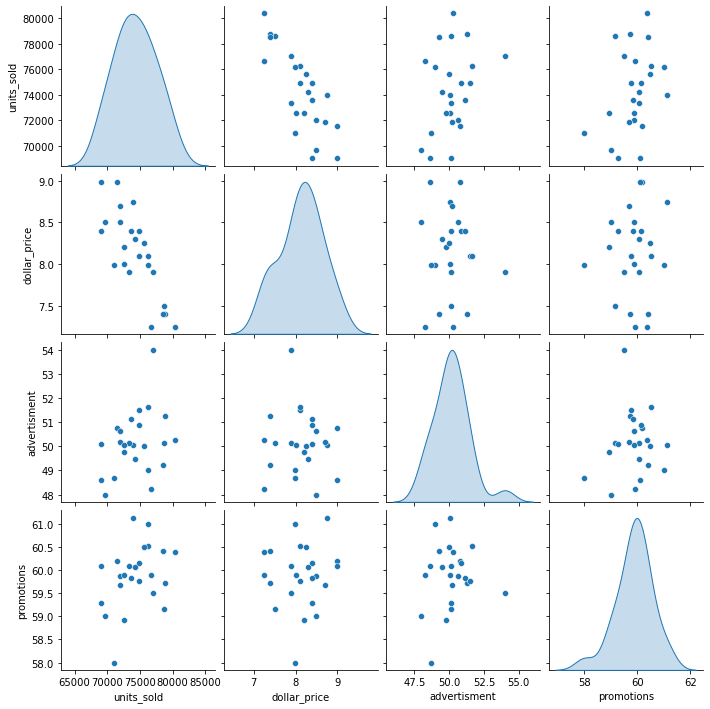

In [15]:
sns.pairplot(df[key_columns], diag_kind = 'kde');

**Correlation Between Variables**

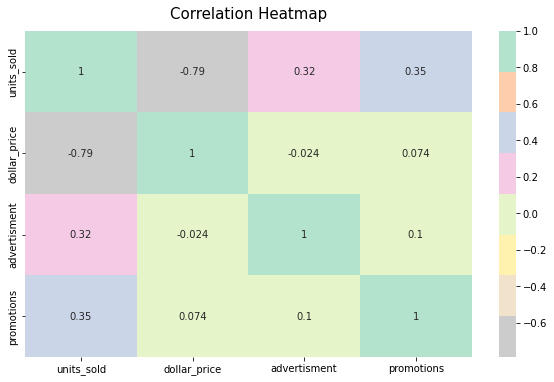

In [16]:
corr = df[key_columns].corr().round(3)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot= True, cmap='Pastel2_r')
plt.title("Correlation Heatmap", fontdict={'fontsize':15},pad=12);

**Prep For Linear Regression**

In [17]:
#Splitting The Data
x = df[key_columns].drop(columns = 'units_sold')
y = df['units_sold']

In [18]:
#doing the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [19]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)

print("\n")

print('y_train: ', y_train.shape)
print('y_test: ', y_train.shape)

display(x_train.head())
display(y_train.head())

x_train:  (19, 3)
x_test:  (5, 3)


y_train:  (19,)
y_test:  (19,)


,dollar_price,advertisment,promotions
6,8.40,50.87,60.14
15,8.30,49.46,60.06
0,8.75,50.04,61.13
13,7.40,49.24,60.40
2,7.50,50.14,59.16


6     74885
15    74247
0     73959
13    78542
2     78587
Name: units_sold, dtype: int64

**Standardization**

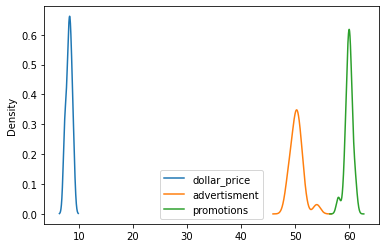

In [20]:
x_train.plot(kind = 'kde');

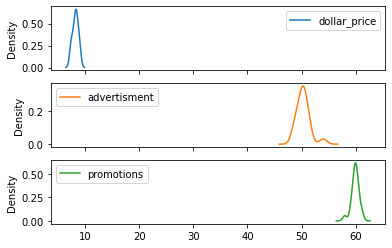

In [21]:
x_train.plot(kind = 'kde', subplots = True);

In [22]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler().fit(x_train)

x_train_scaled = Scaler.transform(x_train)

In [23]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)

<AxesSubplot:ylabel='Density'>

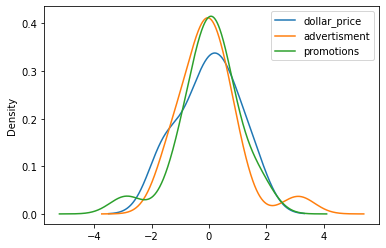

In [24]:
x_train_scaled.plot(kind = 'kde')

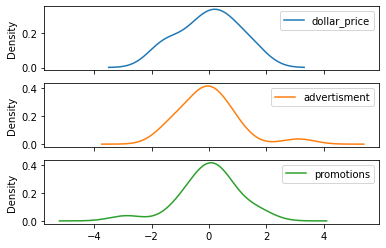

In [25]:
x_train_scaled.plot(kind = 'kde', subplots = True);

## <font color= red> Model building </font> 💥⚡

In [26]:
y.mean()

74258.29166666667

**Normal Data**

In [27]:
# call the model 
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model.score(x_train, y_train)))

# make the predictions on train data
predictions = np.round(model.predict(x_train),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, predictions))) # the 2f means that its is for 2 decimal

R^2: 0.87
RMSE: 1144.65
MAE: 809.04


**Scaled Data**

In [28]:
# call the model 
model2 = LinearRegression()

# fit the model
model2.fit(x_train_scaled, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model2.score(x_train_scaled, y_train)))

# make the predictions on train data
predictions = np.round(model2.predict(x_train_scaled),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, predictions))) # the 2f means that its is for 2 decimal

R^2: 0.87
RMSE: 1144.65
MAE: 809.04


## <font color= red>  Train Data Predictions </font>

In [29]:
output = pd.DataFrame({"actual": y_train, 
                       "predictions": predictions})

# sort the index
output = output.sort_index()

# new output
output.head()

,actual,predictions
0,73959,73447.8
1,71544,70763.2
2,78587,76394.2
3,80364,80170.6
4,78771,78657.9


In [30]:
predictions

array([73905. , 73442. , 73447.8, 78789.2, 76394.2, 71800.3, 69289. ,
       70763.2, 70664. , 78657.9, 71001.3, 73449.1, 77219.2, 80170.6,
       76036.5, 76645.3, 72734.8, 75167.6, 74884. ])

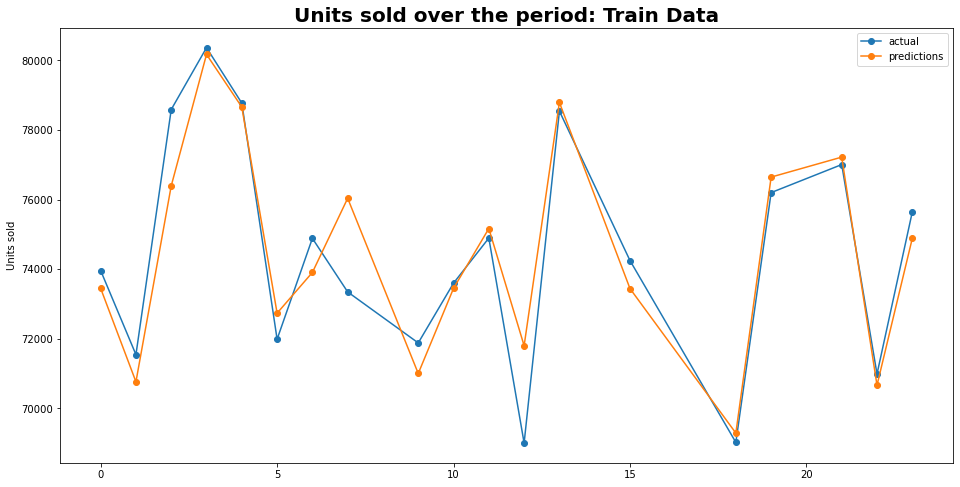

In [31]:
# add prediction back to the data and visualise
#  See how good the model is at predicting the trained y data

#plot size
plt.figure(figsize = (16,8))

# line chart
plt.plot(output["actual"], marker = "o", label = "actual")
plt.plot(output["predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Train Data", fontdict={'fontsize':20 , 'fontweight':'bold'})

# show labels
plt.legend()

# show
plt.show();

## <font color= red>  Test Data Predictions </font>

In [32]:
# predicting for test data 

test_predictions = np.round(model.predict(x_test),1)

# calculate the score
print("R^2 of test: {:.2f}".format(model.score(x_test, y_test)))


# accuracy metrics
print("RMSE of test: {:.2f}".format(mean_squared_error(y_test, test_predictions, squared = False)))
print("MAE of test: {:.2f}".format(mean_absolute_error(y_test, test_predictions))) # the 2f means that its is for 2 decimal

R^2 of test: 0.74
RMSE of test: 1330.18
MAE of test: 1033.68


In [33]:
test_output = pd.DataFrame({"actual": y_test,
             "predictions": test_predictions})
test_output = test_output.sort_index()
test_output.head()

,actual,predictions
8,76659,78027.3
14,72543,75067.5
16,76253,76676.5
17,72582,71984.0
20,69701,69446.9


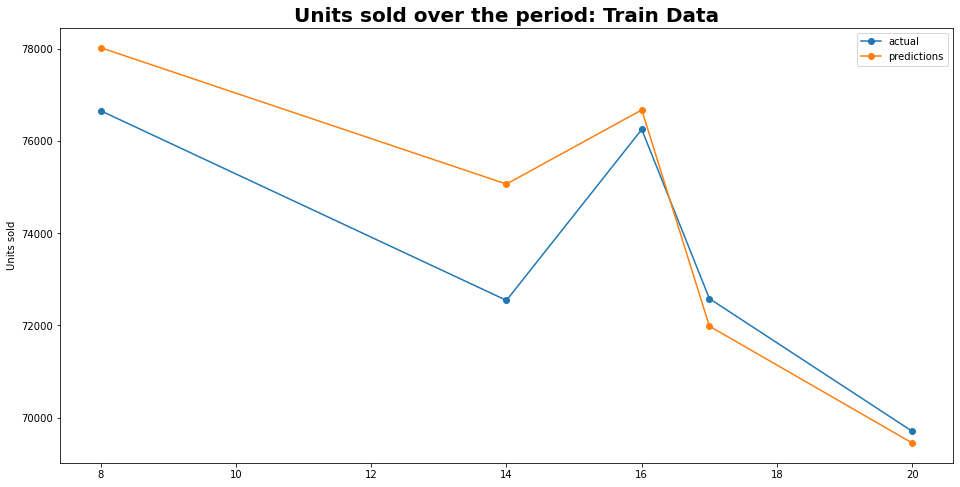

In [34]:
#plot size
plt.figure(figsize = (16,8))

# line chart
plt.plot(test_output["actual"], marker = "o", label = "actual")
plt.plot(test_output["predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Train Data", fontdict={'fontsize':20 , 'fontweight':'bold'})

# show labels
plt.legend()

# show
plt.show();

In [35]:
model.score(x_train, y_train)

0.8712660352357794

In [36]:
model.score(x_test, y_test)

0.7377677097336098

##  <font color= red> Decision making </font>💲

In [37]:
scenario = scenario[['price', 'adv','promo']]
scenario.columns =  ['dollar_price', 'advertisment','promotions']
scenario

,dollar_price,advertisment,promotions
0,10,50,61
1,8,45,55
2,6,40,50
3,10,40,50


In [38]:
projections = np.round(model.predict(scenario[['dollar_price', 'advertisment','promotions']]),0)
projections

array([66476., 62594., 60646., 39218.])

In [39]:
#adding the projections to the data
scenario["projections"] = projections
scenario

,dollar_price,advertisment,promotions,projections
0,10,50,61,66476.0
1,8,45,55,62594.0
2,6,40,50,60646.0
3,10,40,50,39218.0


In [46]:
scenario["projections"] = projections
scenario.style.set_properties(**{'background-color': 'black',
                                   'color': 'white',
                                   'border-color': 'white'}, subset= ['projections'])

,dollar_price,advertisment,promotions,projections
0,10,50,61,66476.000000
1,8,45,55,62594.000000
2,6,40,50,60646.000000
3,10,40,50,39218.000000


In [42]:
scenario[scenario["projections"] == scenario["projections"].max()]

,dollar_price,advertisment,promotions,projections
0,10,50,61,66476.0


##  <font color= red> Model Coefficients </font>


A linear regression model is of the type: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_2 $ ; where $\beta_0$ is the intercept and other $\beta$ are the coefficient of the columns. 

The linear regression model will help us find the value of these $\beta$

In [50]:
print("The intercept is", np.round(model.intercept_,1))
print("The co-efficients are:", np.round(model.coef_,1))

The intercept is -27846.9
The co-efficients are: [-5357.    598.5  1933.9]


In [54]:
# Putting the values in a dataframe
coeffs = pd.DataFrame(np.round(model.coef_,1), x_train.columns, columns = ["Coefficient"])
display(coeffs)

,Coefficient
dollar_price,-5357.0
advertisment,598.5
promotions,1933.9


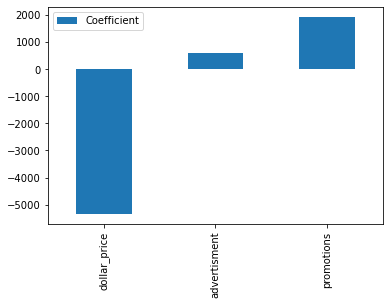

In [56]:
coeffs.plot(kind = 'bar');

Hence our equation will be:

𝑢𝑛𝑖𝑡𝑠𝑠𝑜𝑙𝑑=−27846.9+−5357.0⋅𝑑𝑜𝑙𝑙𝑎𝑟𝑝𝑟𝑖𝑐𝑒+598.5⋅𝑎𝑑𝑣𝑒𝑟𝑡𝑖𝑠𝑚𝑒𝑛𝑡+1933.9⋅𝑝𝑟𝑜𝑚𝑜𝑡𝑖𝑜𝑛𝑠